# 1. Import the Packages

In [46]:
# Standard Python libraries
import os
import random
import time
from datetime import datetime

# Libraries for data manipulation and visualization
import cv2
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Libraries for detection and classification
from mtcnn import MTCNN 
from keras_facenet import FaceNet

# 2. Data Set Aquisition

Capturing data set for new user from camera using MTCNN detector

In [47]:
def captureImage():
    # initialize the MTCNN detector
    detector = MTCNN()

    # initialize the video capture object for the default camera
    cam = cv2.VideoCapture(0)

    # initialize catured frame variable

    while True:
        # read the frame from the camera
        ret, frame = cam.read()

        # detect faces using MTCNN
        faces = detector.detect_faces(frame)

        # draw bounding boxes around the faces
        for face in faces:
            x, y, w, h = face['box']
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)

        # show the resulting frame
        cv2.imshow('Real-time Face Detection', frame)

        # press 'q' key to exit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # release the video capture object and close all windows
    cam.release()
    cv2.destroyAllWindows()

## 3. Preprocessing Image

### 3.1. MTCNN Part

Extract faces from captured image using MTCNN and resize the image into 160x160. After that, do flip and contrast stretching to resized image

In [74]:
class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160, 160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()

    def extract_faces(self, filename):
        img = cv2.imread(filename)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        hasil_deteksi = self.detector.detect_faces(img)

        # Getting x, y, w, h from image 'box'
        x, y, w, h = hasil_deteksi[0]['box']
        x, y, w, h = abs(x), abs(y), abs(w), abs(h)

        # Draw rectangle box on detected face
        img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 10)

        wajah = img[y:y + h, x:x + w]
        wajah_arr = cv2.resize(wajah, self.target_size)
        return wajah_arr

    def load_faces(self, dir, class_label):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = os.path.join(dir, im_name)
                single_face = self.extract_faces(path)
                FACES.append(single_face)
                self.Y.append(class_label)
            except Exception as e:
                pass
        return FACES

    def parse_filename(self, filename):
        # Mengambil NIM dan Nama dari nama file dengan pola "NIM_Nama_i.jpg"
        nim, nama, _ = filename.split('_')
        return nim, nama

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = os.path.join(self.directory, sub_dir)
            FACES = self.load_faces(path, sub_dir)
            labels = [sub_dir for _ in range(len(FACES))]

            print(f"Loaded Successfully: {len(labels)}")

            # Append original images to X and Y
            # self.X.extend(FACES)
            # self.Y.extend(labels)

            # Create subdirectories based on class names
            dataset_folder = "datawajah"
            output_dir = os.path.join(dataset_folder, sub_dir)
            os.makedirs(output_dir, exist_ok=True)

            # Save images to subdirectories
            num_images = len(FACES)
            for i, face in enumerate(FACES):
                nim, nama = self.parse_filename(os.listdir(os.path.join(self.directory, sub_dir))[i])
                
                # Save and append original images to X and Y
                self.X.append(face)
                self.Y.append(sub_dir)
                original_filename = f"{nim}_{nama}_{i+1}.jpg"
                output_path_original = os.path.join(output_dir, original_filename)
                cv2.imwrite(output_path_original, cv2.cvtColor(face, cv2.COLOR_RGB2BGR))

                # Apply flipping, save, and append flipped image to X and Y
                flipped_face = cv2.flip(face, 1)  # 1 for horizontal flip
                self.X.append(flipped_face)
                self.Y.append(sub_dir)
                flipped_filename = f"{nim}_{nama}_{i+num_images+1}.jpg"
                output_path_flip = os.path.join(output_dir, flipped_filename)
                cv2.imwrite(output_path_flip, cv2.cvtColor(flipped_face, cv2.COLOR_RGB2BGR))

                # Apply contrast stretching, save, and append contrast-stretched image to X and Y
                contrast_stretched_face = self.contrast_stretching(face)
                self.X.append(contrast_stretched_face)
                self.Y.append(sub_dir)
                stretched_filename = f"{nim}_{nama}_{i+2*num_images+1}.jpg"
                output_path_stretch = os.path.join(output_dir, stretched_filename)
                cv2.imwrite(output_path_stretch, cv2.cvtColor(contrast_stretched_face, cv2.COLOR_RGB2BGR))
                
        return np.asarray(self.X), np.asarray(self.Y)

    def contrast_stretching(self, image):
        # Compute minimum and maximum pixel values for each channel
        min_val = np.min(image, axis=(0, 1))
        max_val = np.max(image, axis=(0, 1))

        # Perform contrast stretching for each channel
        stretched = (image - min_val) * (255.0 / (max_val - min_val))
        stretched = np.clip(stretched, 0, 255).astype(np.uint8)

        return stretched

# Gunakan kelas FACELOADING dengan folder direktori "capturedfaces"
face_loader = FACELOADING("capturedfaces")
X, Y = face_loader.load_classes()

1/1 [==============================] - 0s 22ms/step
Labels: ['rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-ramadhan', 'rizky-mahesa-

In [75]:
print(f"Unique Labels: {set(Y)}")
print(f'Total Images in Array: {len(X)}')

Unique Labels: {'rizky-nurhadhi', 'rizky-mahesa-ramadhan'}
Total Images in Array: 300


Creating dataframe that containing available images from extracted faces and checking total files in the folder

In [76]:
# Initialize main dataset folder
capture_folder = "capturedfaces"

# Initialize main dataset folder
dataset_folder = "datawajah"

In [77]:
def create_dataframe():
    root_folder = dataset_folder

    data = []
  
    # Iterate through the main folder and subfolders
    for root, dirs, files in os.walk(root_folder):
        for file in files:
        # Get the subfolder name (classes)
            classes = os.path.basename(root)

            # Get the full path of the image
            image_path = os.path.join(classes, file)

            # Add data to the list
            data.append({'Classes': classes, 'File Name': file, 'Image Path': image_path})

    # Create a dataframe from the data list
    df = pd.DataFrame(data)

    # Save the dataframe to an Excel file
    excel_file_name = 'dataframe_and_model_files/faces_train_data.xlsx'
    df.to_excel(excel_file_name, index=False)

    print("Dataframe successfully saved to", excel_file_name)

    return df

In [78]:
def total_images_per_class(df):
    # Function to calculate the total number of files in a folder.
    def total_file(classes):
        return len(df[df['Classes'] == classes].values)

    # Iterate through unique classes and print the total number of files for each class
    unique_classes = df['Classes'].unique()
    print("Total number of images in each class :")
    for classes in unique_classes:
        count = total_file(classes)
        print(f"'{classes}': {count} images")

In [79]:
# Create the dataframe
df = create_dataframe()

# Calculate and print the total number of images in each class
total_images_per_class(df)

Dataframe successfully saved to dataframe_and_model_files/faces_train_data.xlsx
Total number of images in each class :
'rizky-mahesa-ramadhan': 150 images
'rizky-nurhadhi': 150 images


In [80]:
df.sample(5)

,Classes,File Name,Image Path
112,rizky-mahesa-ramadhan,1207070112_Rizky Mahesa Ramadhan_65.jpg,rizky-mahesa-ramadhan\1207070112_Rizky Mahesa ...
46,rizky-mahesa-ramadhan,1207070112_Rizky Mahesa Ramadhan_140.jpg,rizky-mahesa-ramadhan\1207070112_Rizky Mahesa ...
140,rizky-mahesa-ramadhan,1207070112_Rizky Mahesa Ramadhan_90.jpg,rizky-mahesa-ramadhan\1207070112_Rizky Mahesa ...
255,rizky-nurhadhi,1207070113_Rizky Nurhadhi_59.jpg,rizky-nurhadhi\1207070113_Rizky Nurhadhi_59.jpg
81,rizky-mahesa-ramadhan,1207070112_Rizky Mahesa Ramadhan_37.jpg,rizky-mahesa-ramadhan\1207070112_Rizky Mahesa ...


### 3.2. FaceNet Part

Embed the dataset to 512 dimension image (1x1x512) and save it into .npz file

In [81]:
embedder = FaceNet()

def get_embedding(face_image):
    face_image = face_image.astype('float32') # 3D(160x160x3)
    face_image = np.expand_dims(face_image, axis=0) # 4D(Nonex160x160x3)
    
    yhat = embedder.embeddings(face_image)

    return yhat[0] #512D image (1x1x152)

In [82]:
EMBEDDED_X = []

for face_image in X:
    EMBEDDED_X.append(get_embedding(face_image))

EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 [==============================] - 0s 59ms/step


In [83]:
embedded_file_name = "dataframe_and_model_files/embedded_dataset.npz"
np.savez_compressed(embedded_file_name, EMBEDDED_X, Y)
print("Embedded dataset successfully saved to", embedded_file_name)

print(f"Unique Labels: {set(Y)}")
print(f'Total Embedded Images in Array: {len(EMBEDDED_X)}')

Embedded dataset successfully saved to dataframe_and_model_files/embedded_dataset.npz
Unique Labels: {'rizky-nurhadhi', 'rizky-mahesa-ramadhan'}
Total Embedded Images in Array: 300


1/1 [==============================] - 0s 59ms/step


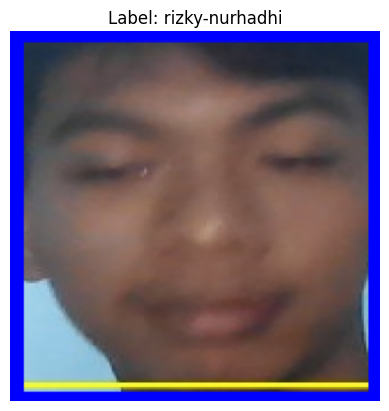

Embedded Vector: [ 0.03644568  0.03664266 -0.01476273  0.0198091   0.07061069 -0.01474523
  0.02059096 -0.03316354 -0.05066067 -0.00436951  0.06603637 -0.06420971
  0.00265957 -0.00392577  0.05755785 -0.01579923  0.05705355  0.07734198
 -0.03040017  0.0239831   0.03941923  0.02699193  0.03297171  0.00589291
  0.00681366  0.00119135  0.02892255 -0.07284082  0.08132971 -0.03673325
 -0.0180143   0.06929316 -0.00494619  0.04092944  0.07141733  0.01558485
 -0.01760499 -0.08877243 -0.01525888  0.03780667 -0.0188077  -0.06947666
 -0.00123628 -0.06036973 -0.06806903  0.00939811 -0.03618116  0.02273035
 -0.04563878  0.05634509  0.02652834 -0.06956205  0.02192094  0.07589037
  0.02310906 -0.10393434  0.01126978  0.01711264  0.05123897 -0.01339852
  0.0548319   0.06852766 -0.01813901 -0.00530824  0.02545357 -0.05908706
 -0.0115692  -0.06285903  0.03732551  0.05210564 -0.02756915  0.00867609
 -0.0529493   0.00666931  0.05456408  0.01378903 -0.00095712 -0.00991123
 -0.02201376  0.03544058  0.060753

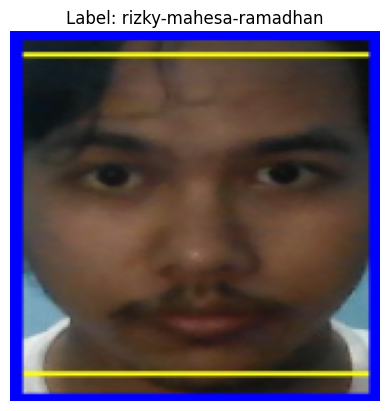

Embedded Vector: [ 0.05121416  0.06187363 -0.01230344  0.02968591  0.03540307 -0.01648149
  0.05117074  0.03208296 -0.02752223 -0.01667087  0.11374354 -0.02246894
  0.0051694  -0.02494686  0.02749168  0.06160789  0.05323968  0.07002414
 -0.05935078  0.03311546  0.00276824 -0.03504178  0.0278212  -0.05386693
 -0.0221757  -0.02346531  0.00042128 -0.08138084  0.02853298 -0.03096033
 -0.02637293  0.00703669 -0.06631413  0.06068513  0.01557956 -0.0014453
  0.07928672 -0.09915001  0.00075934  0.00890709  0.04270415 -0.05667362
 -0.00019113  0.00249652 -0.0557954   0.01294947 -0.04148174  0.04986291
 -0.01734833  0.0193084  -0.02883851 -0.06243445 -0.00768693  0.0258441
  0.01800925 -0.08097291 -0.04018175 -0.04125138  0.00641363  0.00789078
 -0.00418393  0.06933406 -0.05432952  0.06756929 -0.00978531 -0.08206167
 -0.02022407 -0.04652189  0.09291212 -0.05110394 -0.04796061 -0.0252336
 -0.02636506 -0.01084031  0.04896081 -0.0404418  -0.00620389 -0.04826787
  0.00348378 -0.03020518  0.0026567  

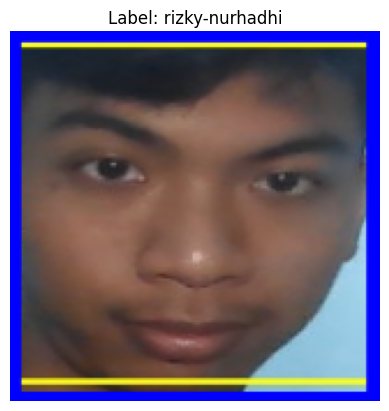

Embedded Vector: [ 5.75617664e-02  1.76663324e-02 -2.51130871e-02  4.55125794e-02
  6.91037178e-02 -1.43583333e-02  3.32844257e-02 -4.80309390e-02
 -5.68072200e-02  1.68403108e-02  3.86113860e-02 -4.16106917e-02
 -2.26064026e-02  2.94358656e-02  2.19778623e-02 -4.34208848e-03
  6.30955622e-02  7.99434185e-02 -2.95776613e-02  6.45379648e-02
  2.03253832e-02  9.92088299e-03  7.41707301e-03 -2.48396471e-02
  1.01562450e-02 -2.96348482e-02  5.76357506e-02 -3.38956304e-02
  8.65354612e-02 -5.32916002e-02 -1.73999481e-02  3.13141271e-02
 -2.17435528e-02  4.89046350e-02  2.43330803e-02 -3.43729295e-02
 -5.66750281e-02 -7.14629367e-02 -1.05620679e-02  1.32050021e-02
 -4.49953116e-02 -6.40560836e-02 -2.79952474e-02 -4.63793091e-02
 -4.10177708e-02  1.95588525e-02 -2.37947553e-02 -1.49388919e-02
 -9.69065659e-05  8.69629309e-02  4.58619632e-02 -9.55004841e-02
  2.89176535e-02  6.32119626e-02 -1.54099036e-02 -1.03381082e-01
 -1.49114402e-02 -1.57401443e-03  3.01009621e-02 -6.20696181e-03
  5.0377

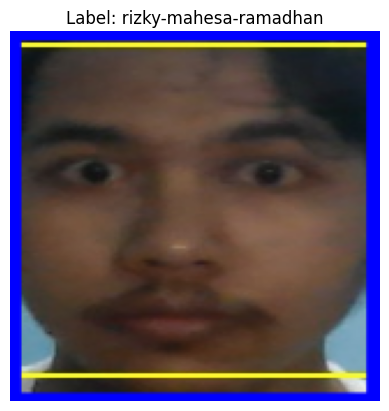

Embedded Vector: [ 0.03641372  0.05613936 -0.02024786  0.02610572  0.03938315 -0.03282407
  0.07215732  0.02752171 -0.01198932 -0.00887764  0.08859978 -0.02704867
 -0.01672032 -0.0384321  -0.00621185  0.05231132  0.04414818  0.07158236
 -0.0753395   0.03761406  0.00111915 -0.00956006 -0.00239503 -0.05680494
 -0.02196259 -0.01345592 -0.01498415 -0.07143249  0.03452606 -0.0234074
 -0.00446348  0.01493216 -0.04786257  0.05213191  0.02335892  0.01201308
  0.07334569 -0.10516242  0.00600401  0.0250284   0.03868306 -0.05525304
  0.02011634  0.00802091 -0.06933843 -0.00736973 -0.0567672   0.03084946
  0.00157945  0.01516922 -0.00236822 -0.077842   -0.00056305  0.03971635
  0.02580057 -0.07339042 -0.0568422  -0.04783287 -0.00971912 -0.01668156
  0.00329964  0.093005   -0.06399997  0.05770355 -0.02166329 -0.07603391
 -0.02239441 -0.0110837   0.09902366 -0.04857951 -0.0458619  -0.02752504
 -0.03197393 -0.02262243  0.0420985  -0.04015488  0.00614738 -0.01945888
 -0.00787298 -0.03303584 -0.0088345

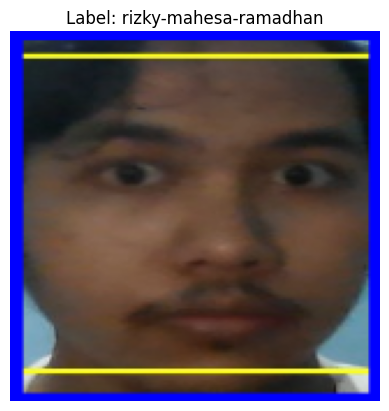

Embedded Vector: [ 4.69050519e-02  4.92979735e-02 -1.82114318e-02  2.73153260e-02
  5.23357205e-02 -2.95876879e-02  6.65139109e-02  2.51599047e-02
 -4.21791105e-03 -1.19910156e-02  8.97943750e-02 -6.66322606e-03
  1.03621220e-03 -2.94438563e-02 -1.76591054e-02  4.25509922e-02
  4.35179397e-02  6.90068305e-02 -5.95286377e-02  5.03612682e-02
  9.91687272e-03 -2.32047830e-02  1.55976089e-02 -6.52999133e-02
 -9.72994138e-03 -2.05300767e-02  1.32612679e-02 -7.67885149e-02
  4.56445813e-02 -3.11621111e-02 -2.18198355e-03  7.15136621e-03
 -5.34107685e-02  6.64258525e-02  2.82473788e-02  7.25957053e-03
  6.40100762e-02 -1.06036469e-01  2.71144253e-03  3.28231081e-02
  3.17859650e-02 -5.80435023e-02  8.80817510e-03 -1.80456287e-03
 -8.53841007e-02  1.59724467e-02 -5.65330759e-02  3.10130138e-02
  1.57142803e-03  8.20776913e-03 -1.90796070e-02 -9.28737521e-02
  7.66082434e-03  6.42649457e-02  2.12969501e-02 -8.62482637e-02
 -3.23324949e-02 -3.23655158e-02 -1.32233100e-02 -2.35268380e-02
 -8.1675

In [84]:
# Load the embedded dataset
loaded_data = np.load("dataframe_and_model_files/embedded_dataset.npz")
EMBEDDED_X, Y = loaded_data['arr_0'], loaded_data['arr_1']

# Select a few samples
num_samples = 5
selected_indices = np.random.choice(len(EMBEDDED_X), num_samples, replace=False)

# Iterate through samples and display original images and their embeddings
for index in selected_indices:
    original_image = X[index]
    label = Y[index]

    # Get the corresponding embedded vector
    embedded_vector = get_embedding(original_image)

    # Display the original image
    plt.imshow(original_image)
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()

    print(f"Embedded Vector: {embedded_vector}")

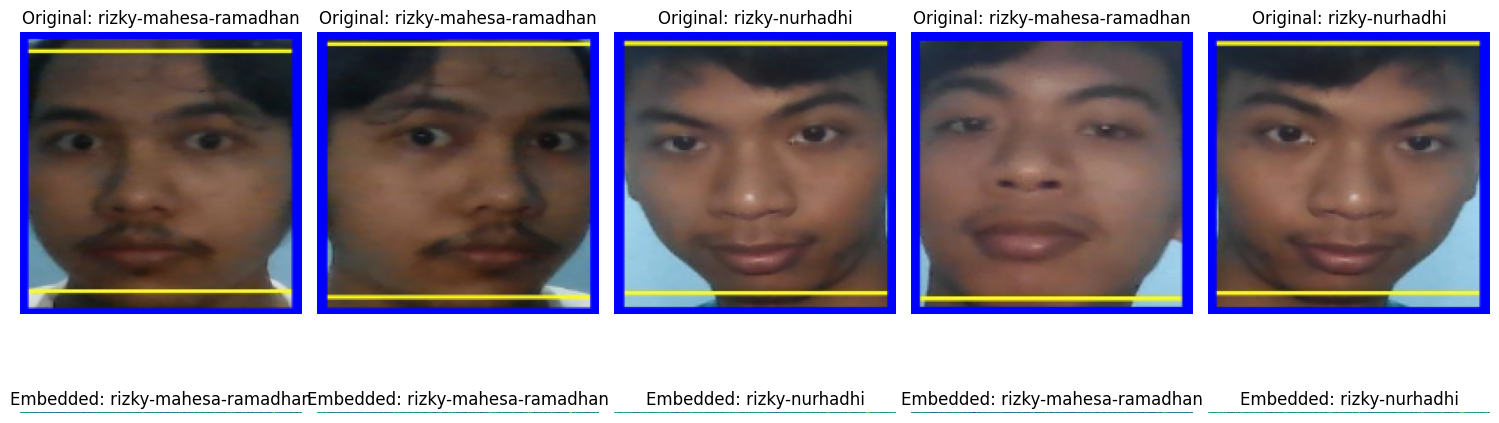

In [86]:
# Choose a few random indices
sample_indices = random.sample(range(len(EMBEDDED_X)), 5)

# Display the sample images with their corresponding labels
plt.figure(figsize=(15, 6))
for i, index in enumerate(sample_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[index])
    plt.title(f"Original: {Y[index]}")
    plt.axis('off')

    plt.subplot(2, 5, i + 6)
    plt.imshow(EMBEDDED_X[index].reshape((1, -1)))
    plt.title(f"Embedded: {Y[index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Check correspondence between images in 'X' and labels in 'Y'
for i in range(len(X)):
    print(f"Label: {Y[i]}, Image Path: {os.path.basename(os.path.normpath(df['Image Path'].iloc[i]))}")

Label: rizky-mahesa-ramadhan, Image Path: 1207070112_Rizky Mahesa Ramadhan_1.jpg
Label: rizky-mahesa-ramadhan, Image Path: 1207070112_Rizky Mahesa Ramadhan_10.jpg
Label: rizky-mahesa-ramadhan, Image Path: 1207070112_Rizky Mahesa Ramadhan_100.jpg
Label: rizky-mahesa-ramadhan, Image Path: 1207070112_Rizky Mahesa Ramadhan_101.jpg
Label: rizky-mahesa-ramadhan, Image Path: 1207070112_Rizky Mahesa Ramadhan_102.jpg
Label: rizky-mahesa-ramadhan, Image Path: 1207070112_Rizky Mahesa Ramadhan_103.jpg
Label: rizky-mahesa-ramadhan, Image Path: 1207070112_Rizky Mahesa Ramadhan_104.jpg
Label: rizky-mahesa-ramadhan, Image Path: 1207070112_Rizky Mahesa Ramadhan_105.jpg
Label: rizky-mahesa-ramadhan, Image Path: 1207070112_Rizky Mahesa Ramadhan_106.jpg
Label: rizky-mahesa-ramadhan, Image Path: 1207070112_Rizky Mahesa Ramadhan_107.jpg
Label: rizky-mahesa-ramadhan, Image Path: 1207070112_Rizky Mahesa Ramadhan_108.jpg
Label: rizky-mahesa-ramadhan, Image Path: 1207070112_Rizky Mahesa Ramadhan_109.jpg
Label: 

In [ ]:
for label in np.unique(Y):
    label_indices = np.where(Y == label)[0]

    for i in label_indices:
        print(f"Label: {Y[i]}, Image Name: {os.path.basename(os.path.normpath(df['Image Path'].iloc[i]))}")

        # Embedding
        embedded_image = get_embedding(X[i])

        print(f"After: Label: {Y[i]}, Image Name: {os.path.basename(os.path.normpath(df['Image Path'].iloc[i]))}")

Label: rizky-mahesa-ramadhan, Image Name: 1207070112_Rizky Mahesa Ramadhan_1.jpg
1/1 [==============================] - 0s 67ms/step
After: Label: rizky-mahesa-ramadhan, Image Name: 1207070112_Rizky Mahesa Ramadhan_1.jpg
Label: rizky-mahesa-ramadhan, Image Name: 1207070112_Rizky Mahesa Ramadhan_10.jpg
1/1 [==============================] - 0s 62ms/step
After: Label: rizky-mahesa-ramadhan, Image Name: 1207070112_Rizky Mahesa Ramadhan_10.jpg
Label: rizky-mahesa-ramadhan, Image Name: 1207070112_Rizky Mahesa Ramadhan_100.jpg
1/1 [==============================] - 0s 60ms/step
After: Label: rizky-mahesa-ramadhan, Image Name: 1207070112_Rizky Mahesa Ramadhan_100.jpg
Label: rizky-mahesa-ramadhan, Image Name: 1207070112_Rizky Mahesa Ramadhan_101.jpg
1/1 [==============================] - 0s 57ms/step
After: Label: rizky-mahesa-ramadhan, Image Name: 1207070112_Rizky Mahesa Ramadhan_101.jpg
Label: rizky-mahesa-ramadhan, Image Name: 1207070112_Rizky Mahesa Ramadhan_102.jpg
1/1 [==================

IndexError: single positional indexer is out-of-bounds

## GUI